In [3]:
import pandas as pd

In [68]:
df=pd.read_csv('NFL.csv')

C:\Users\giris\AppData\Local\Temp\ipykernel_17848\2147582113.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('NFL.csv')


In [69]:
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [70]:
#handle missing data 
#count
df.isnull().sum().sum()

9190078

In [71]:
import numpy as np
df.replace('NS', np.nan, inplace=True)


In [72]:
# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

In [73]:
from sklearn.impute import SimpleImputer
# Separate numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns

In [66]:
 #Impute numeric columns with the mean
numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
numeric_columns

ValueError: Found array with 0 sample(s) (shape=(0, 59)) while a minimum of 1 is required by SimpleImputer.

In [14]:
# Impute non-numeric columns with the most frequent value
non_numeric_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[non_numeric_columns] = non_numeric_imputer.fit_transform(df[non_numeric_columns])


In [15]:
print("\nMissing values after imputation:")
print(df.isnull().sum().sum())


Missing values after imputation:
0


In [57]:
# Step 3: Identify and Handle Outliers
# Use Z-score to identify outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Set a threshold for Z-score
z_threshold = 3

# Check the number of outliers
outliers = (z_scores > z_threshold).sum(axis=1)
num_outliers = len(outliers[outliers > 0])
print(f"\nNumber of rows with outliers: {num_outliers}")




Number of rows with outliers: 0


In [58]:
# Step 4: Correct Inconsistencies
# Check for inconsistencies in categorical data
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())
    print("\n")


Unique values in Date:
[]


Unique values in time:
[]


Unique values in SideofField:
[]


Unique values in posteam:
[]


Unique values in DefensiveTeam:
[]


Unique values in desc:
[]


Unique values in PlayType:
[]


Unique values in Passer_ID:
[]


Unique values in Rusher_ID:
[]


Unique values in Receiver_ID:
[]


Unique values in Tackler1:
[]


Unique values in HomeTeam:
[]


Unique values in AwayTeam:
[]


Unique values in Timeout_Team:
[]




In [59]:
# Correct inconsistencies (example)
# df['column_name'] = df['column_name'].str.lower() # Standardize text data if needed

# Step 5: Remove Duplicates
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [60]:
# Step 7: Normalization and Scaling
# Normalize numeric columns
if df.shape[0] > 0:
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
else:
    raise ValueError("The dataset is empty. Cannot apply scaling.")

print("\nFirst 5 rows after normalization:")
print(df.head())

ValueError: The dataset is empty. Cannot apply scaling.

In [61]:
# Step 8: Data Exploration and Visualization
# Statistical summary of the dataset
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
       GameID  Drive  qtr  down  TimeUnder  TimeSecs  PlayTimeDiff  yrdln  \
count     0.0    0.0  0.0   0.0        0.0       0.0           0.0    0.0   
mean      NaN    NaN  NaN   NaN        NaN       NaN           NaN    NaN   
std       NaN    NaN  NaN   NaN        NaN       NaN           NaN    NaN   
min       NaN    NaN  NaN   NaN        NaN       NaN           NaN    NaN   
25%       NaN    NaN  NaN   NaN        NaN       NaN           NaN    NaN   
50%       NaN    NaN  NaN   NaN        NaN       NaN           NaN    NaN   
75%       NaN    NaN  NaN   NaN        NaN       NaN           NaN    NaN   
max       NaN    NaN  NaN   NaN        NaN       NaN           NaN    NaN   

       yrdline100  ydstogo  ...  TwoPoint_Prob  ExpPts  EPA  Home_WP_pre  \
count         0.0      0.0  ...            0.0     0.0  0.0          0.0   
mean          NaN      NaN  ...            NaN     NaN  NaN          NaN   
std           NaN      NaN  ...            NaN     NaN  N

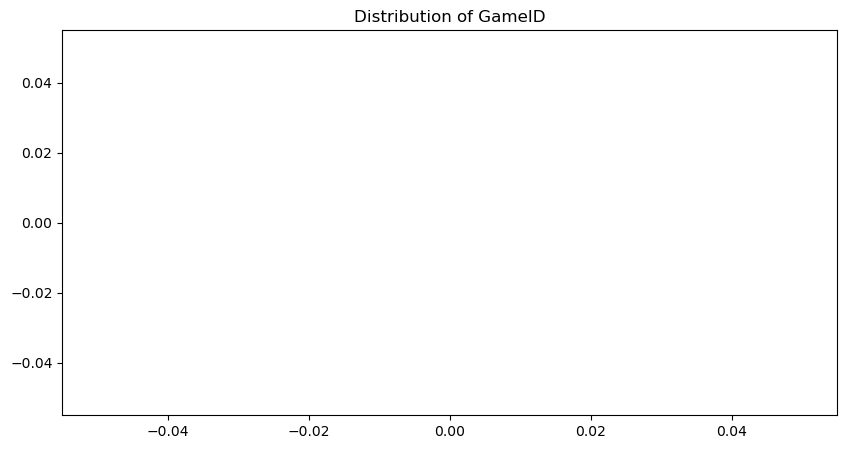

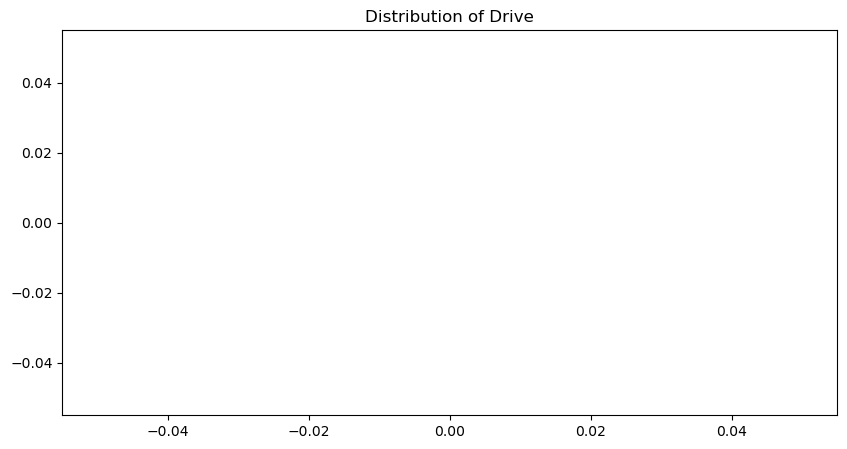

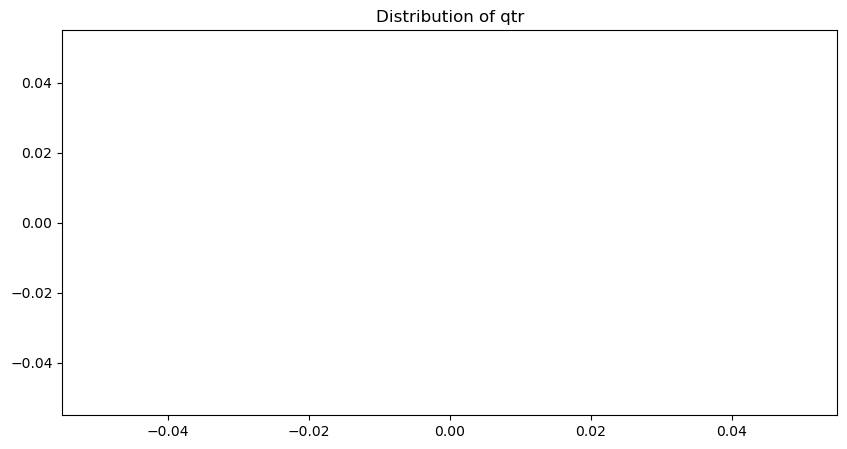

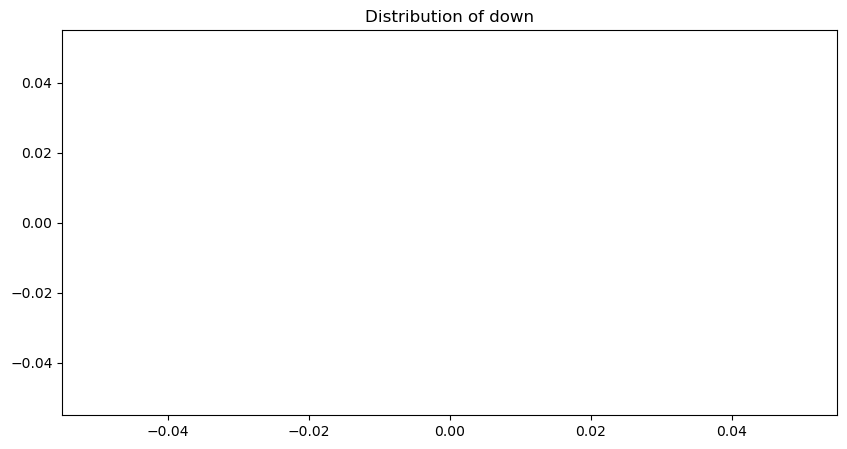

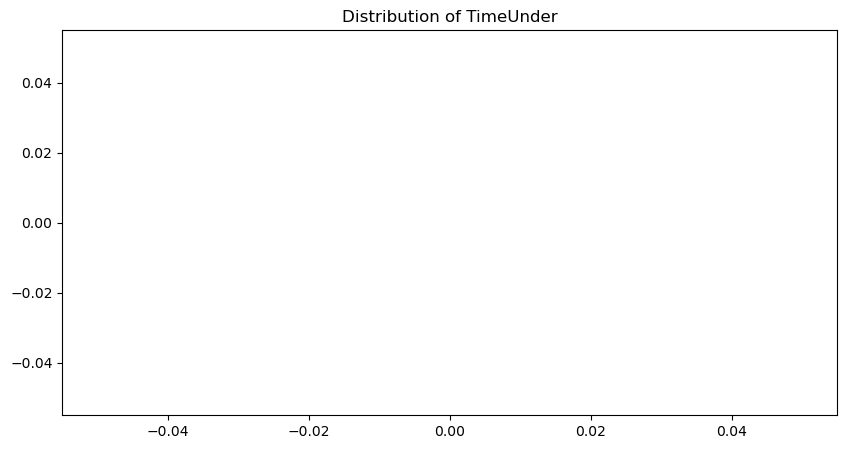

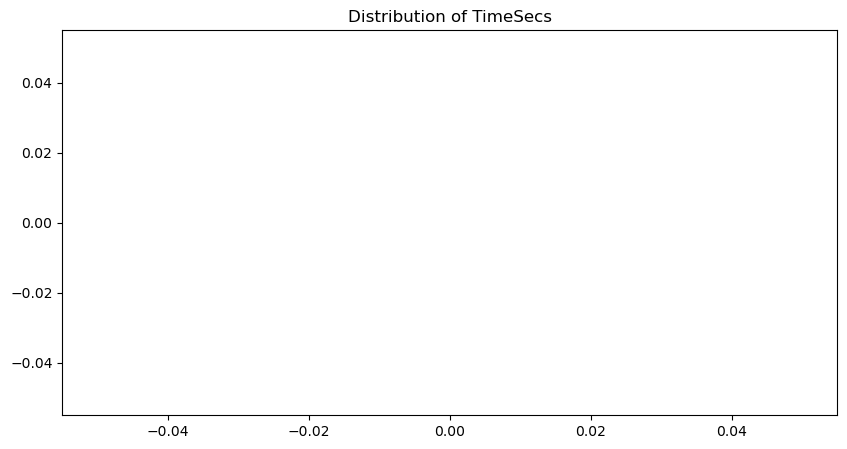

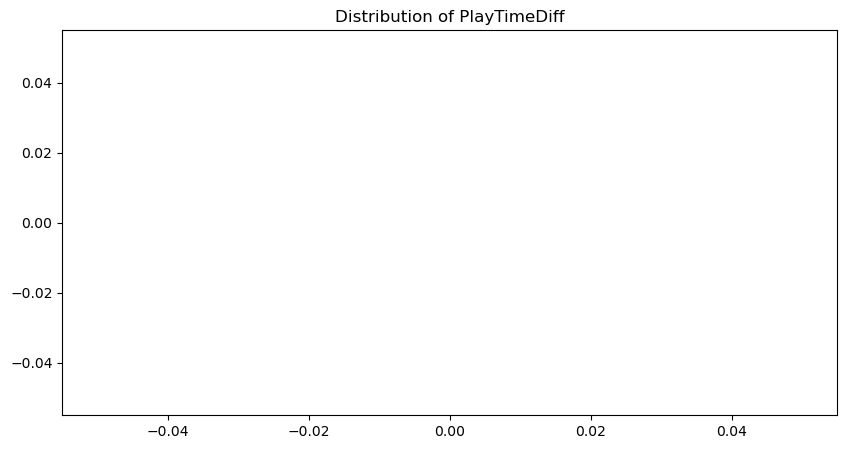

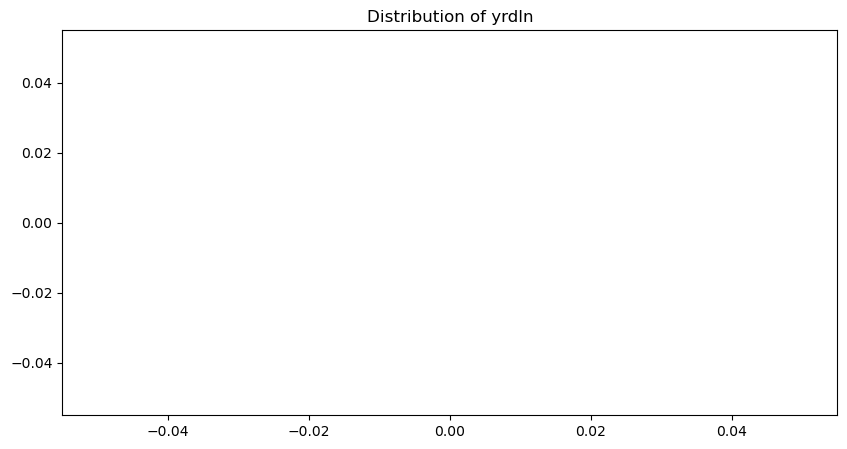

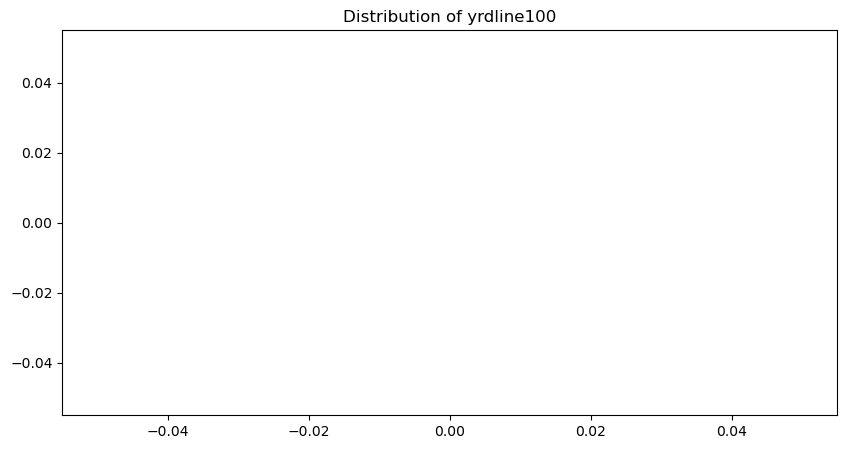

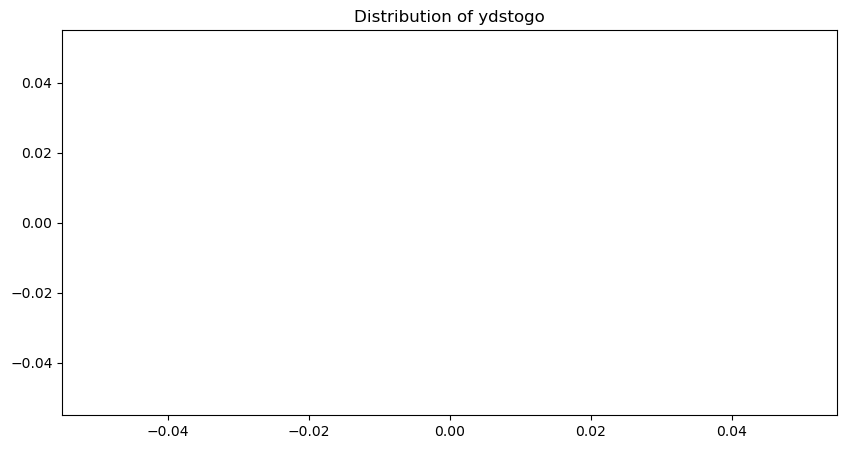

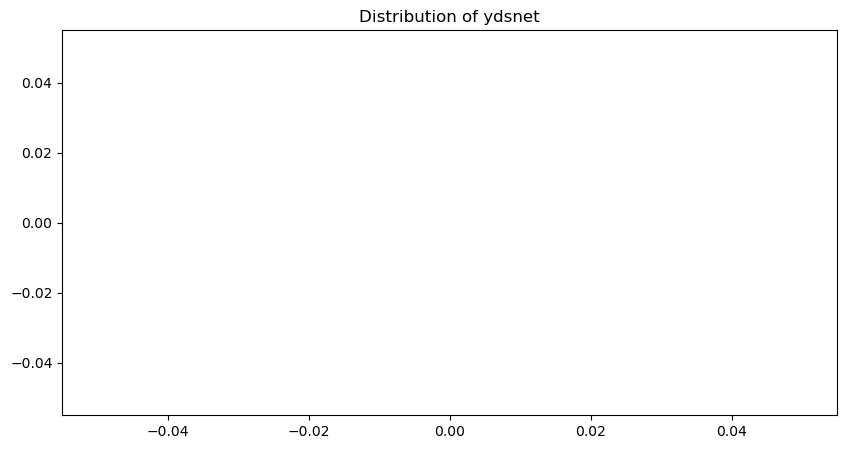

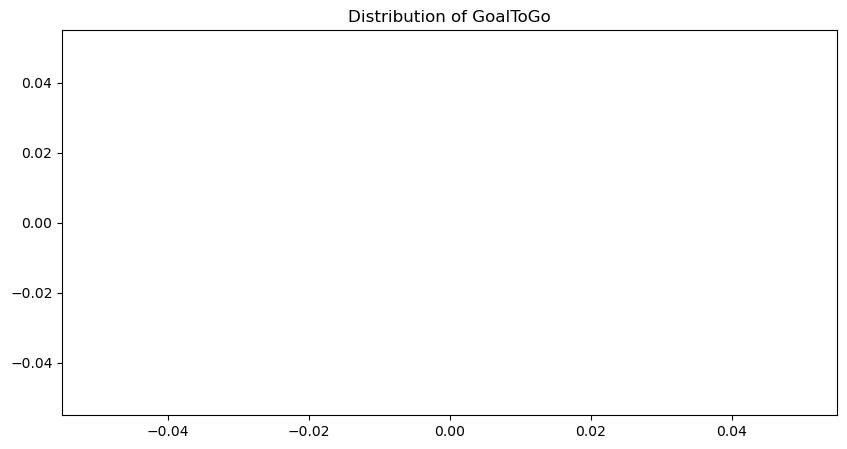

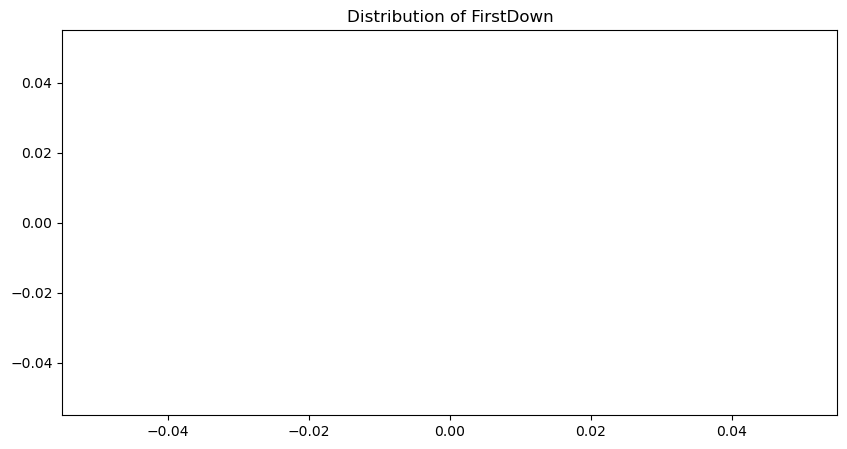

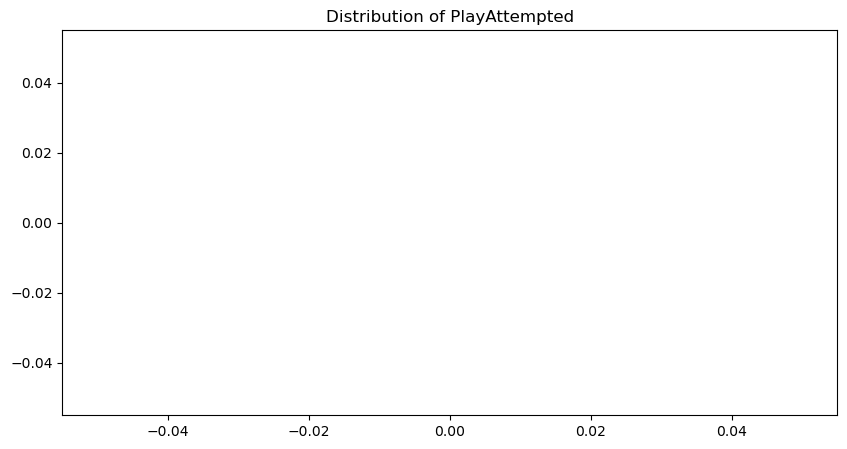

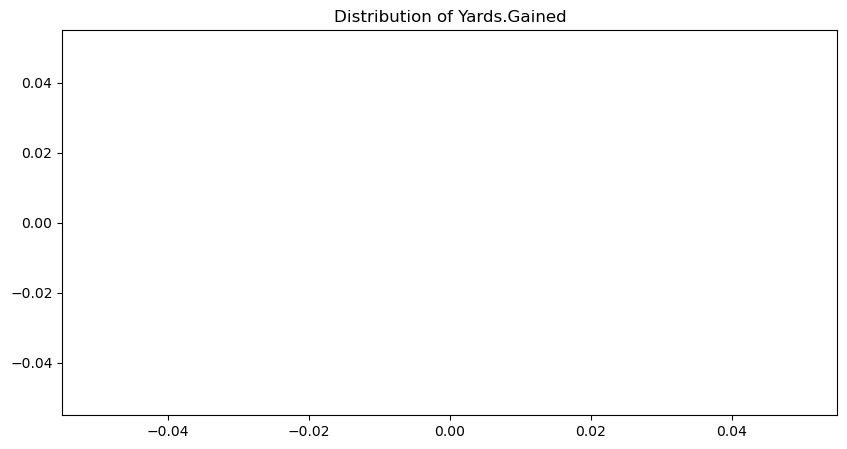

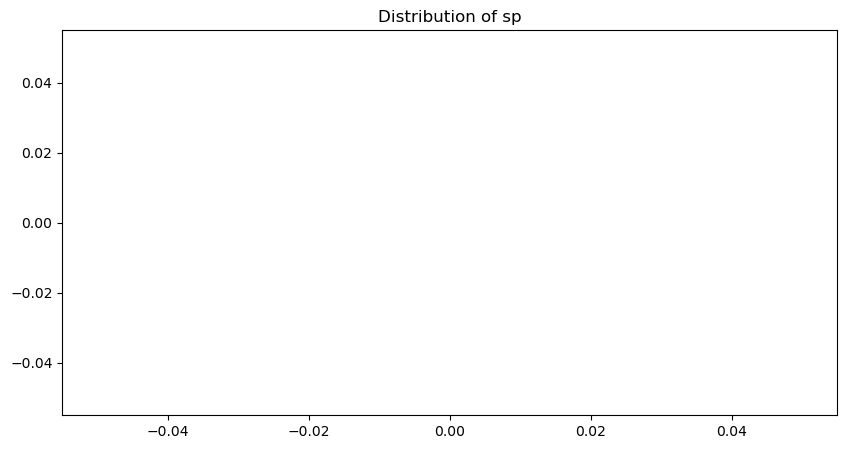

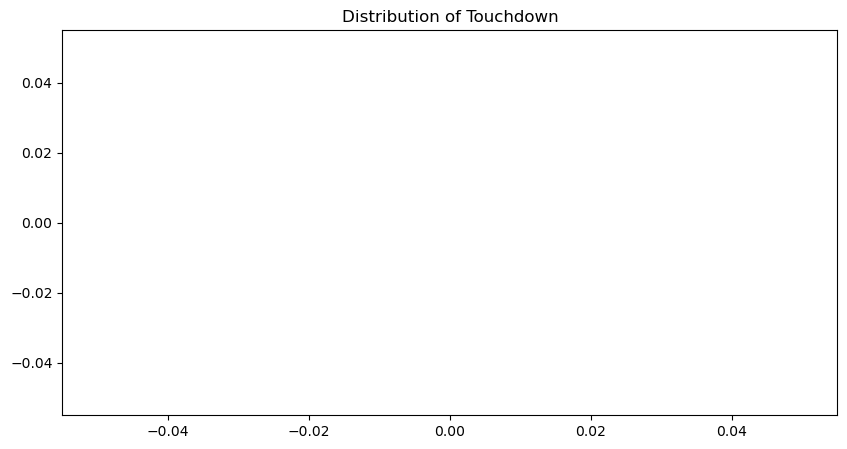

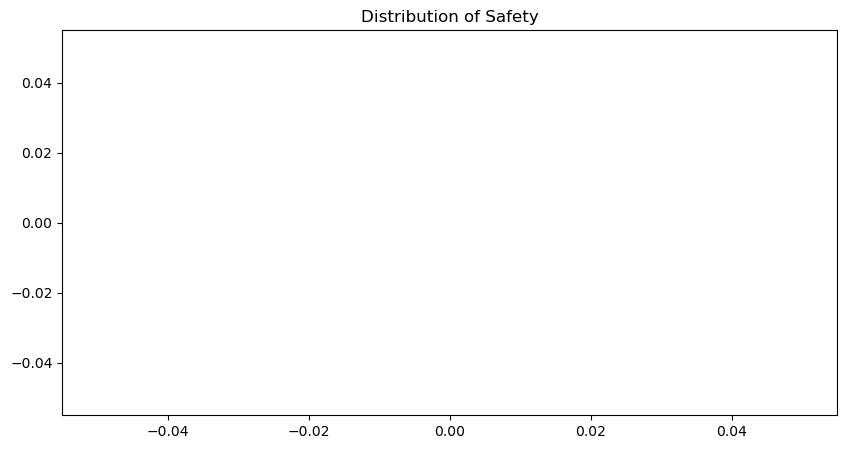

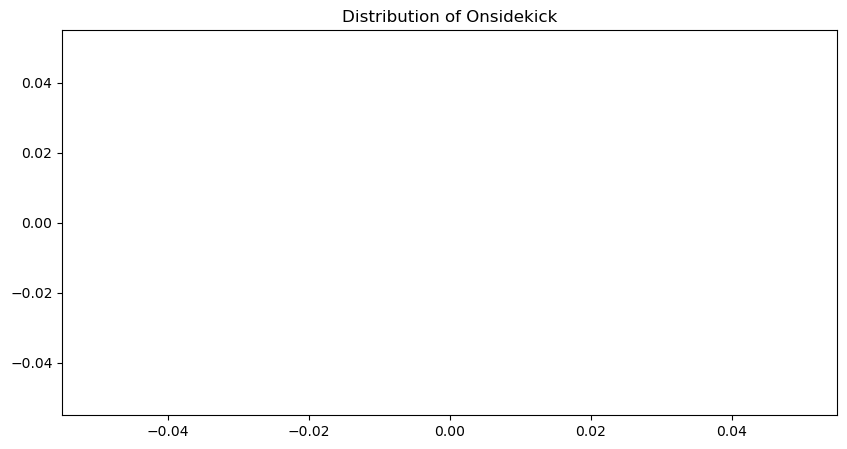

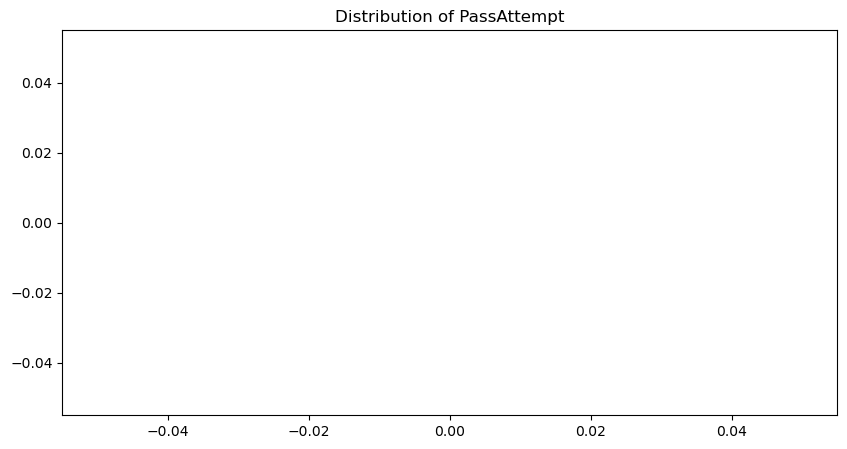

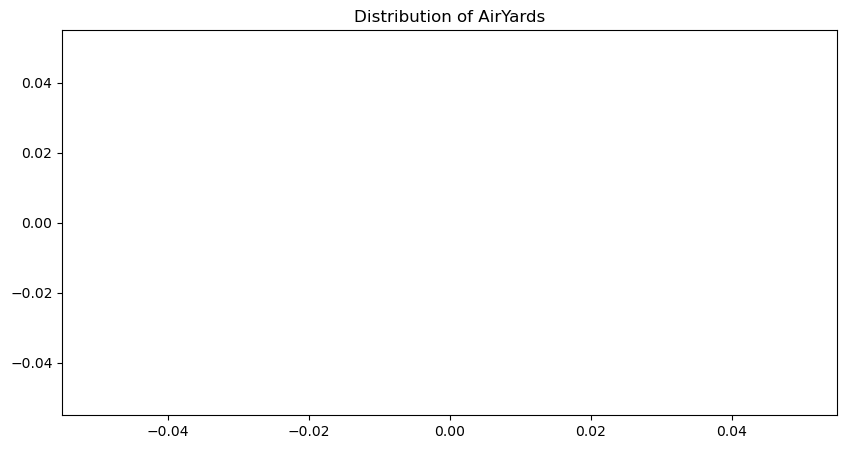

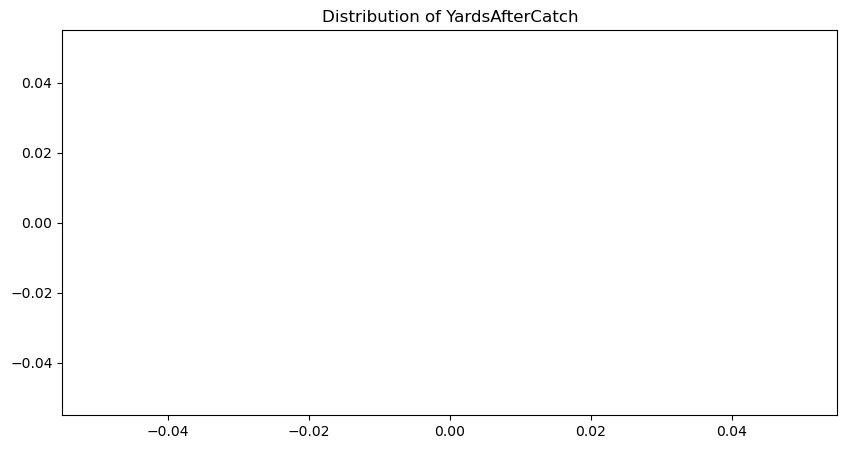

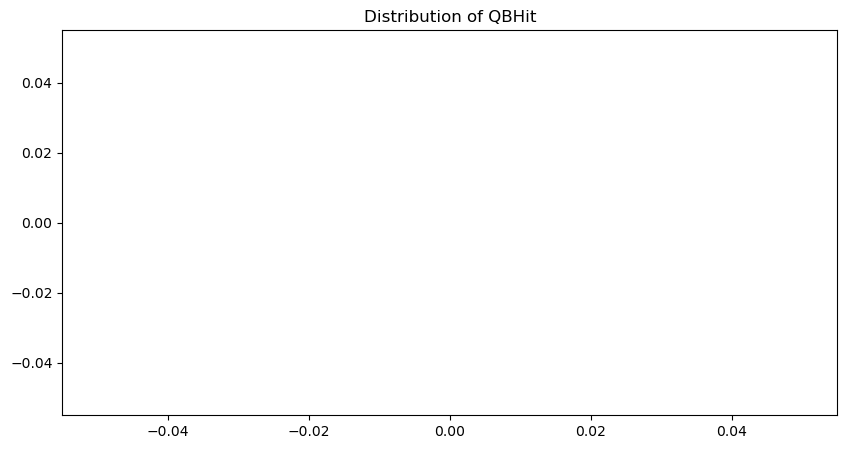

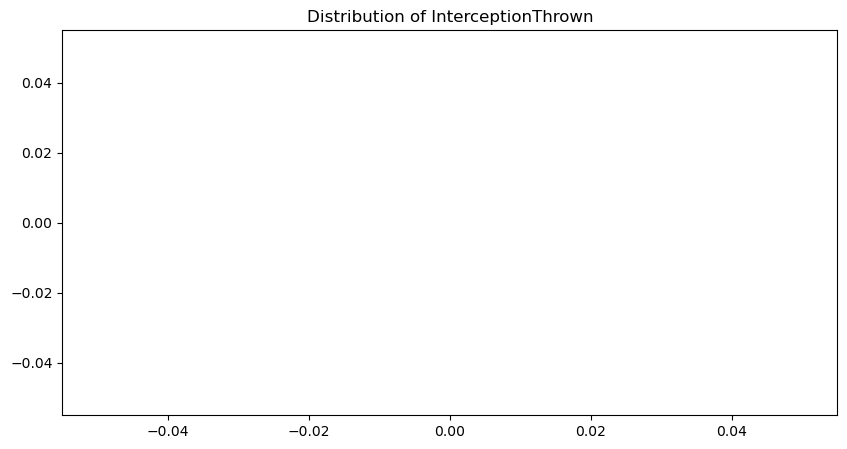

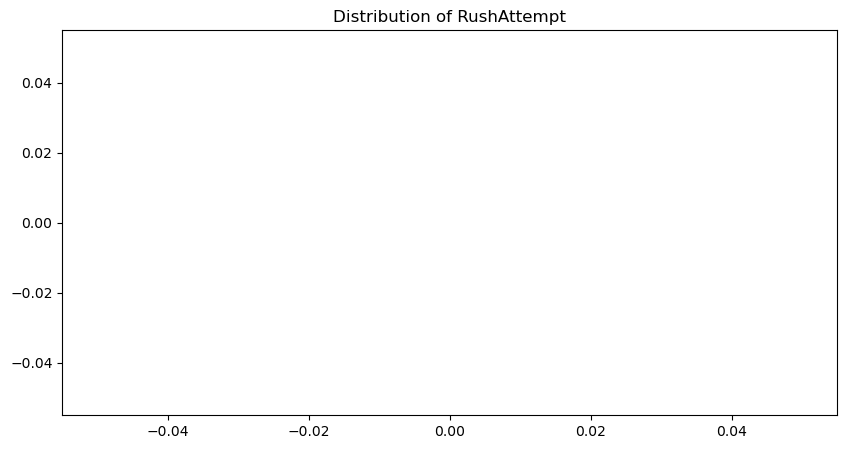

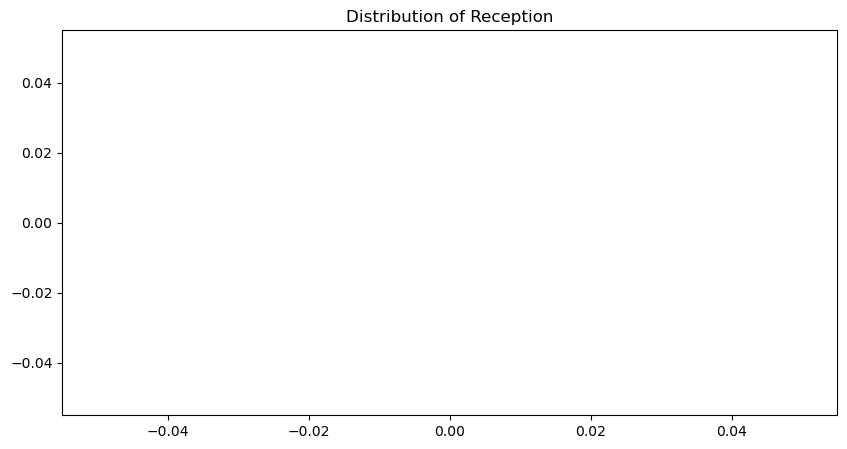

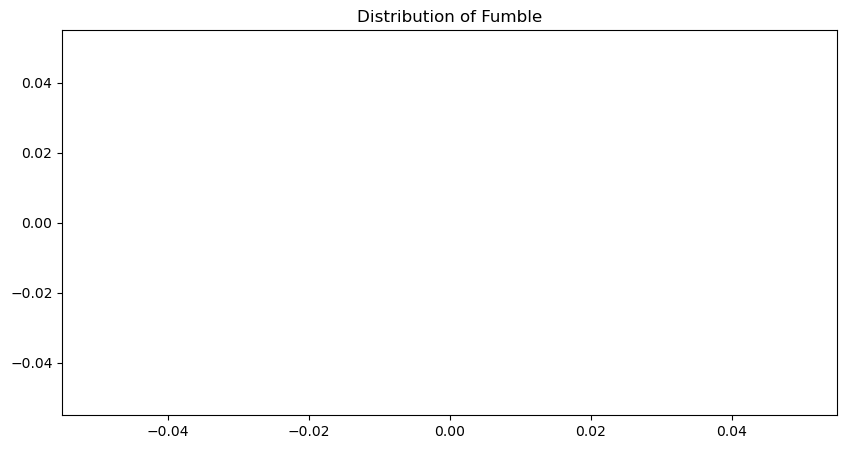

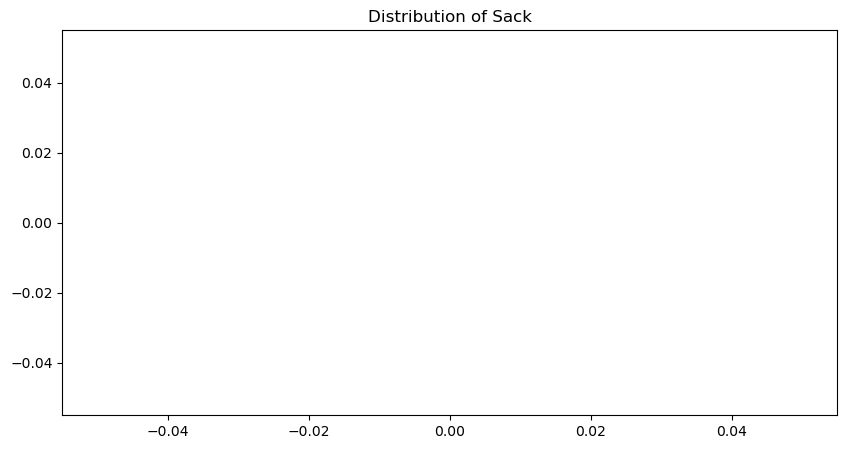

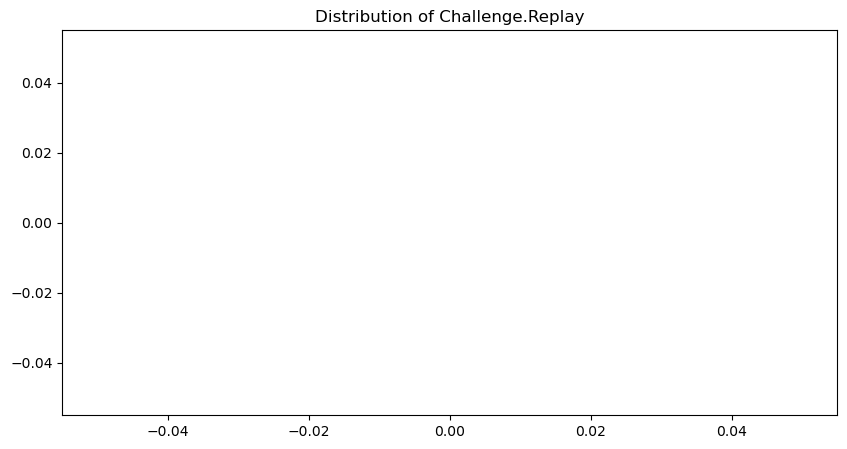

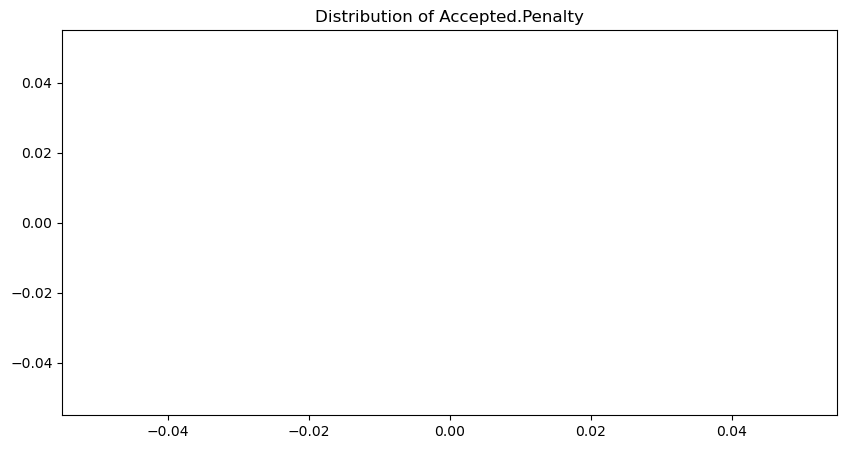

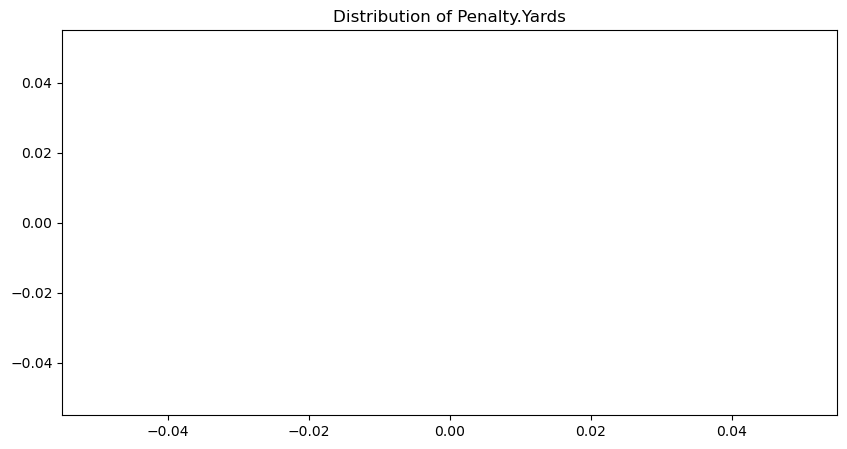

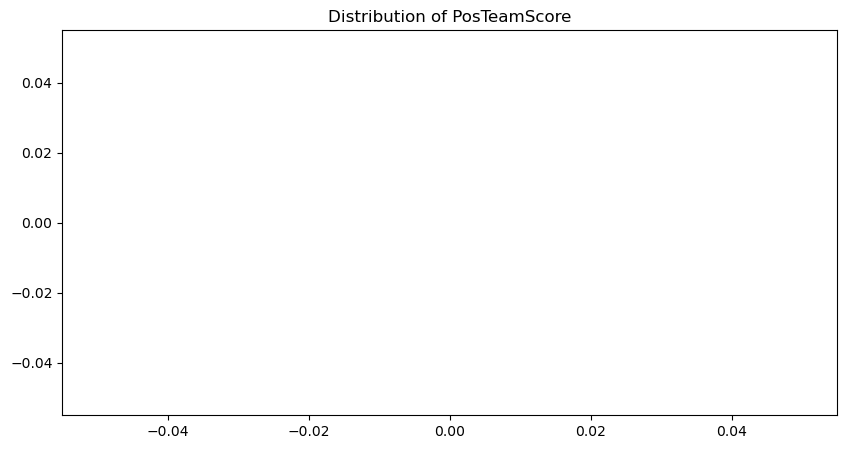

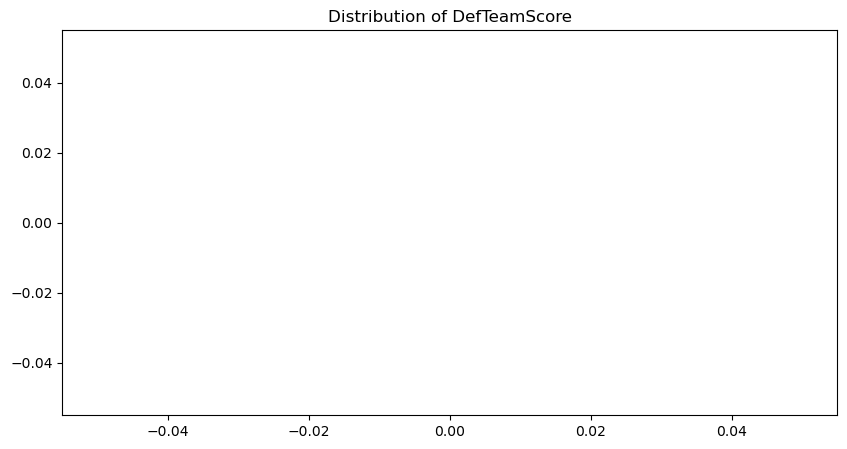

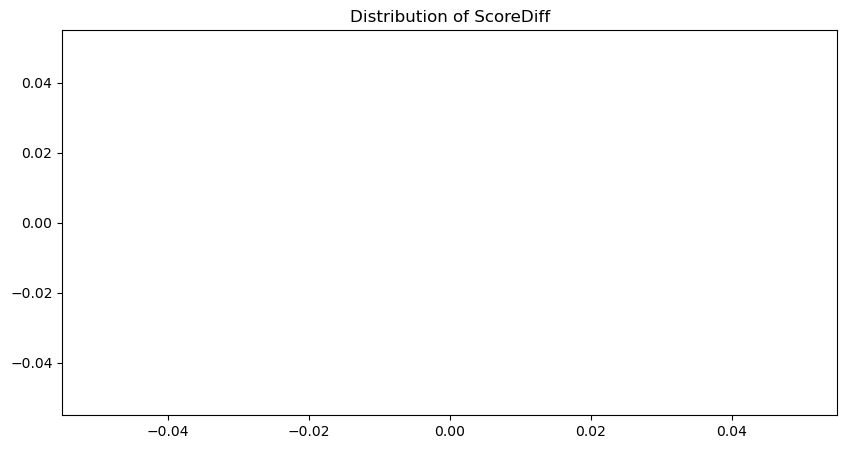

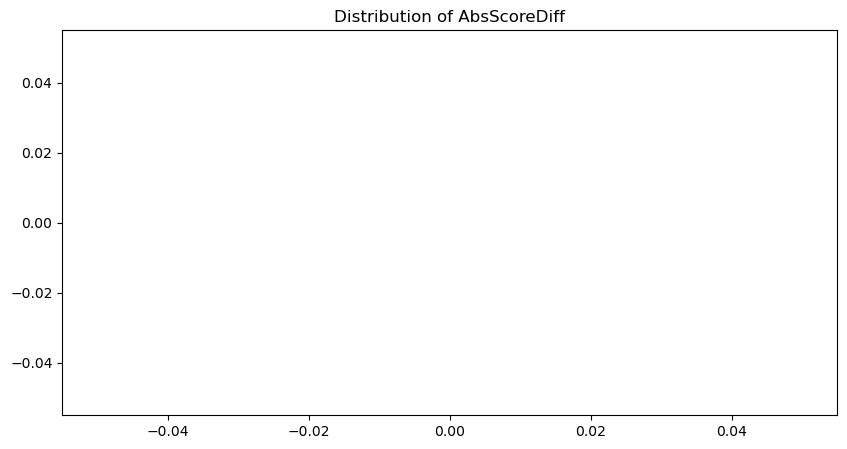

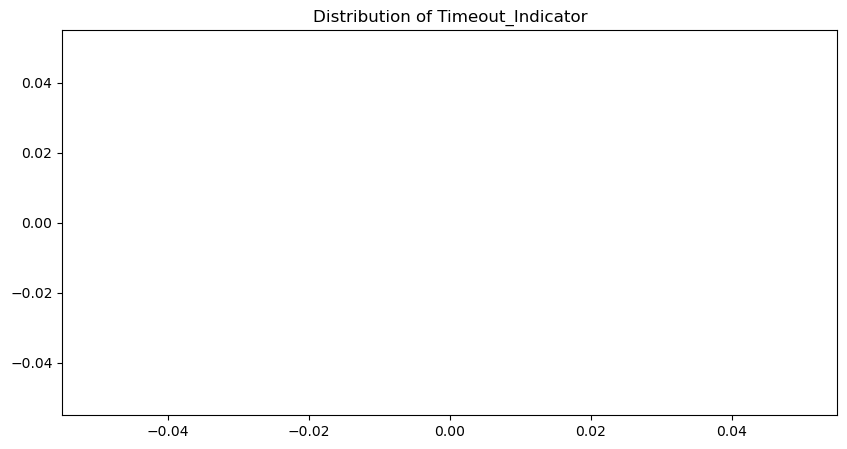

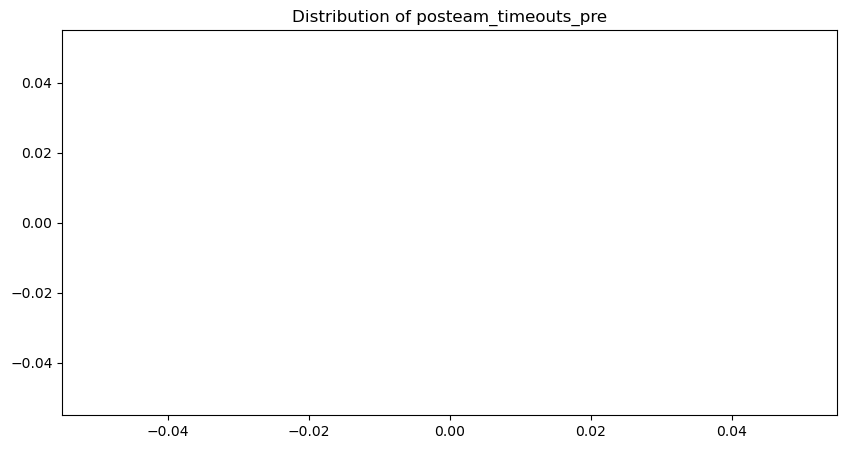

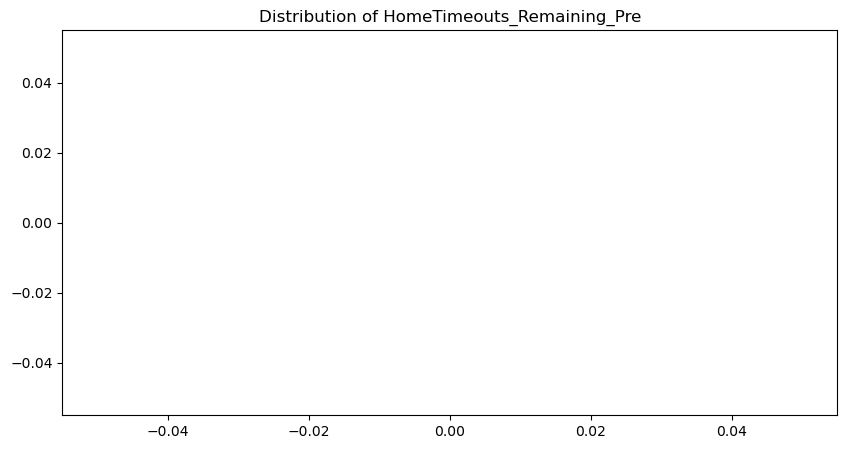

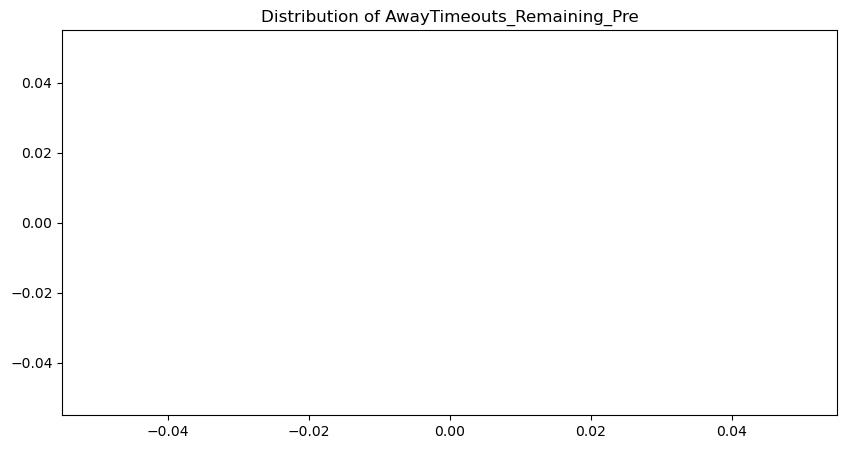

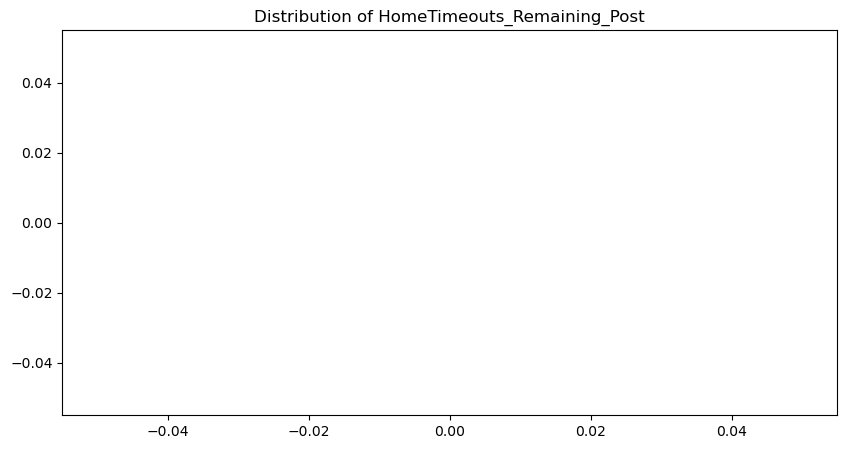

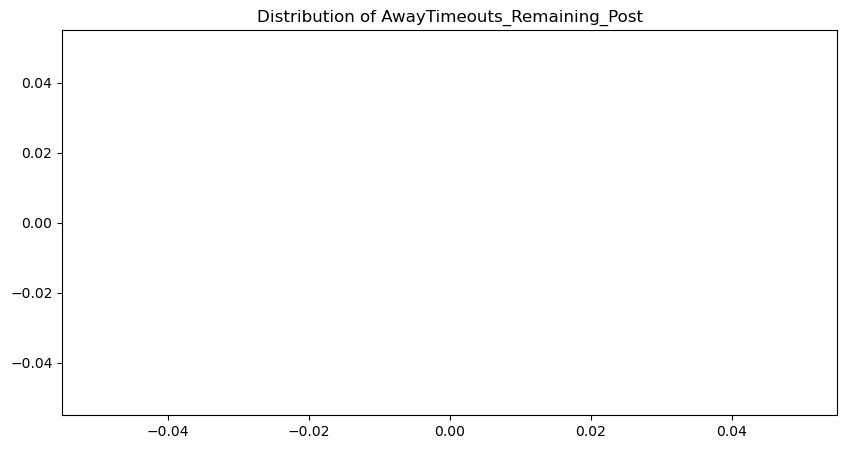

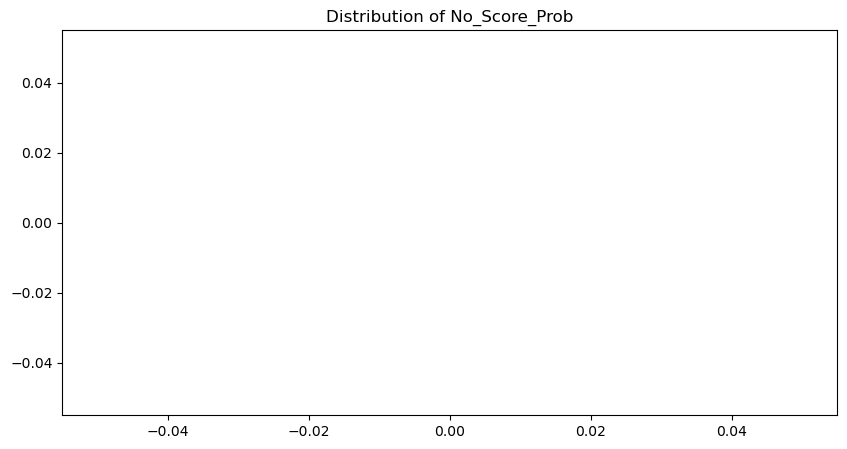

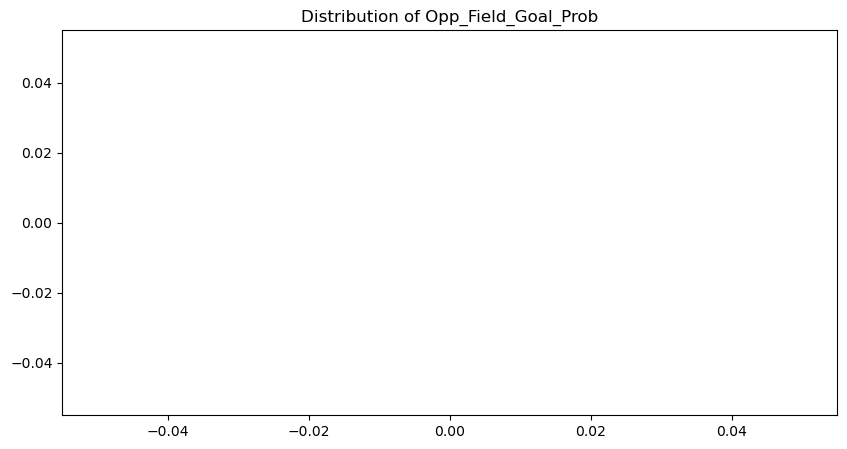

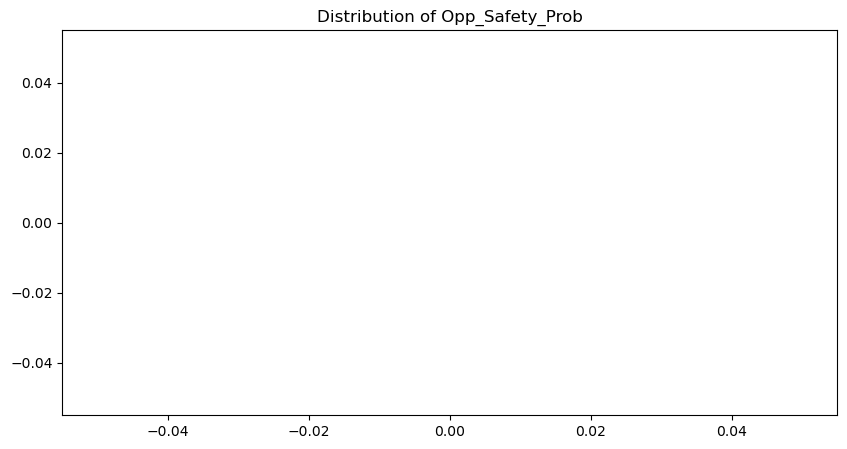

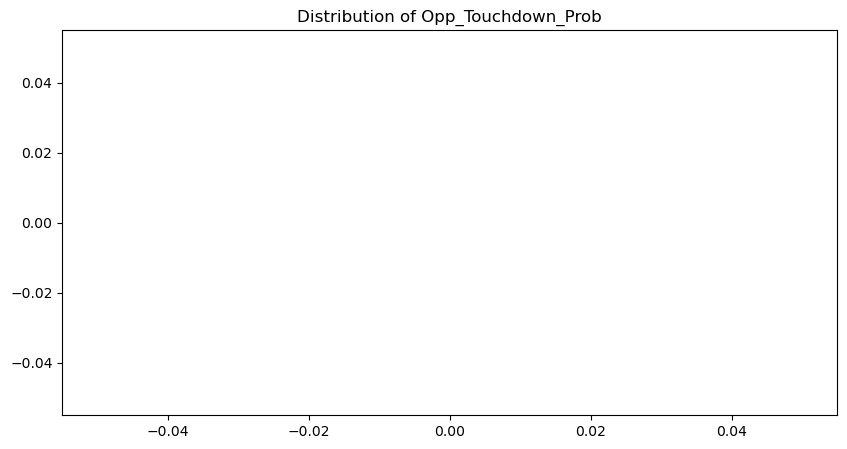

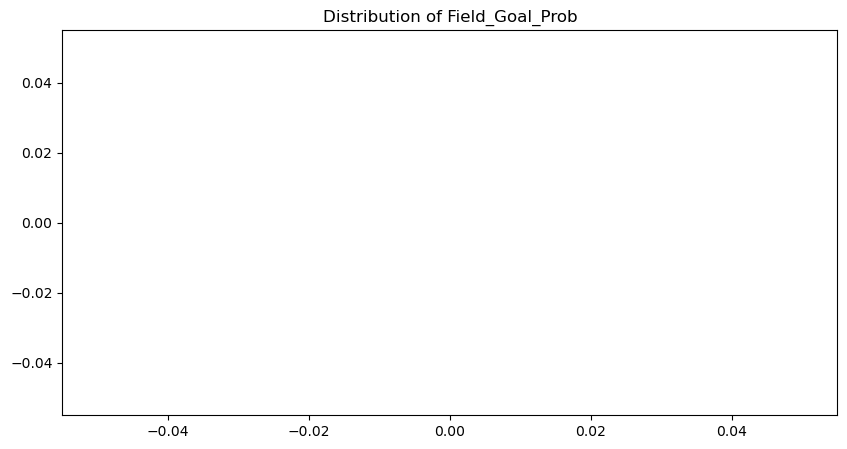

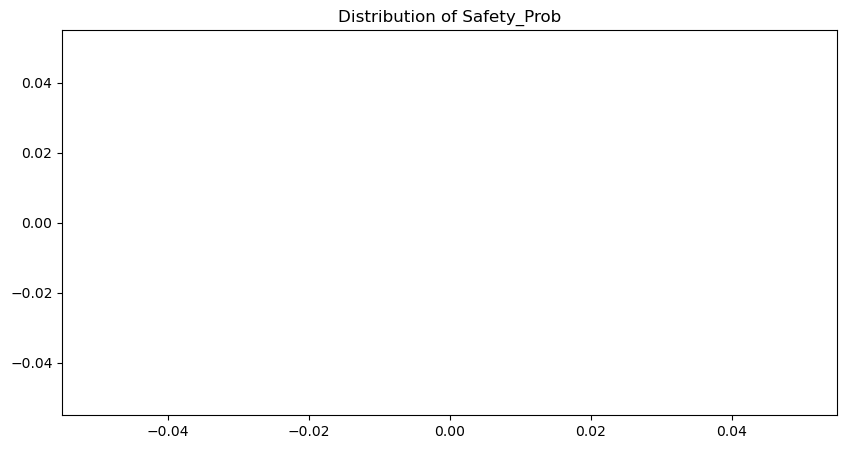

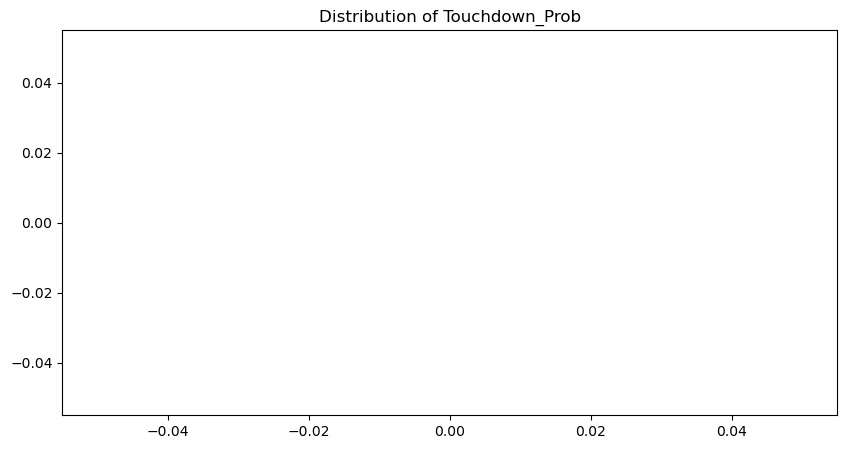

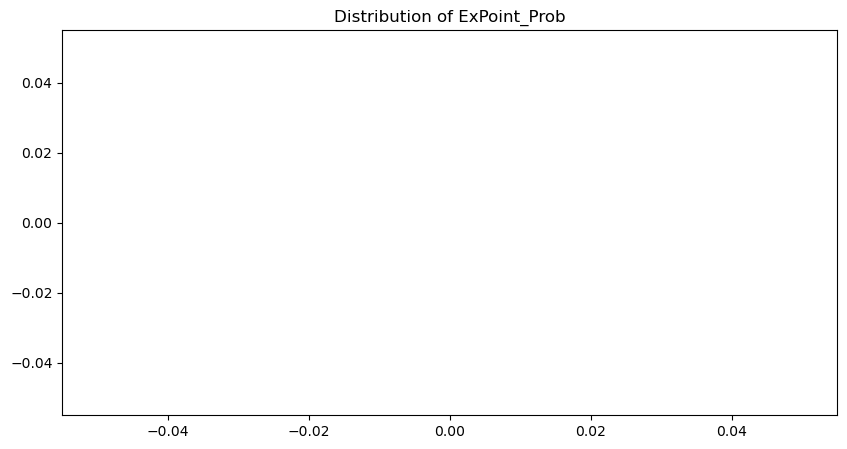

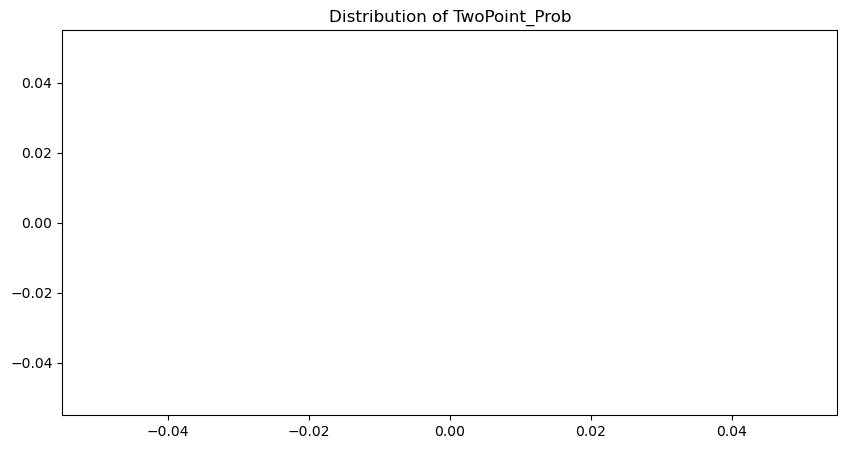

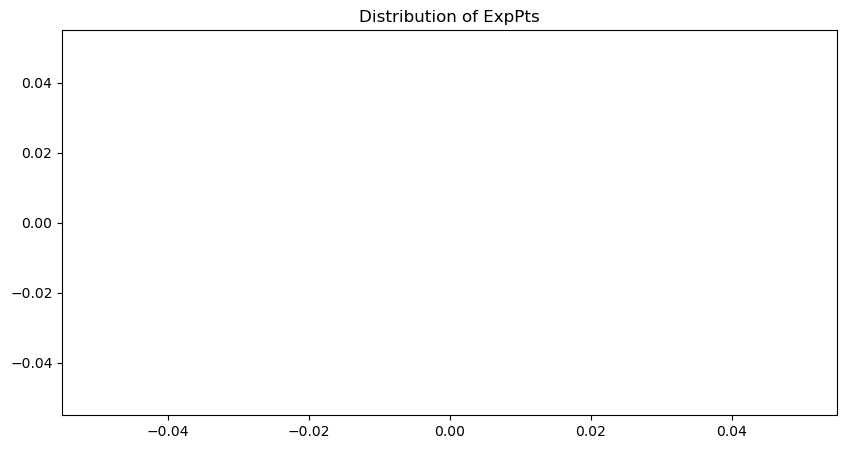

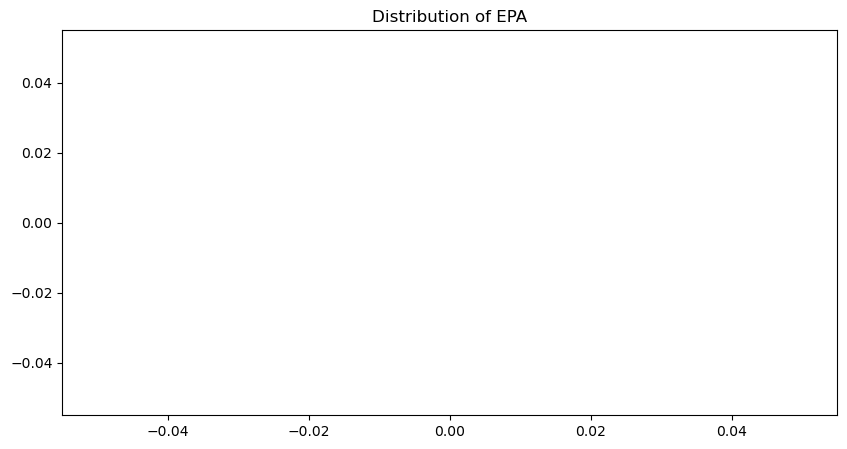

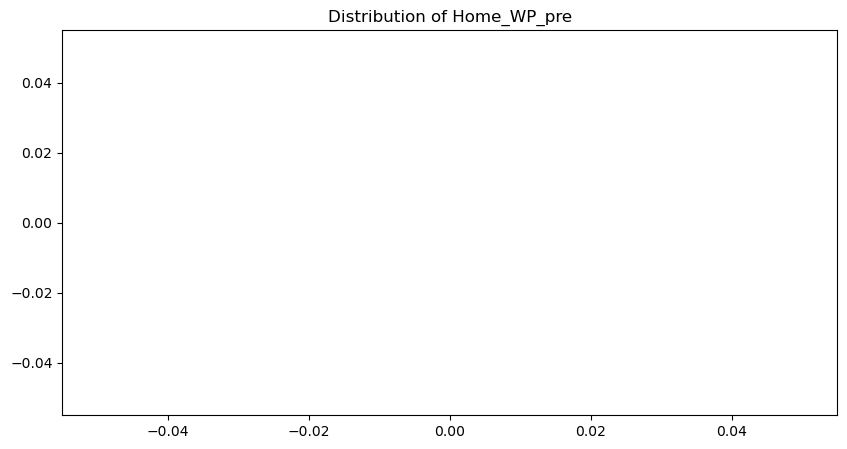

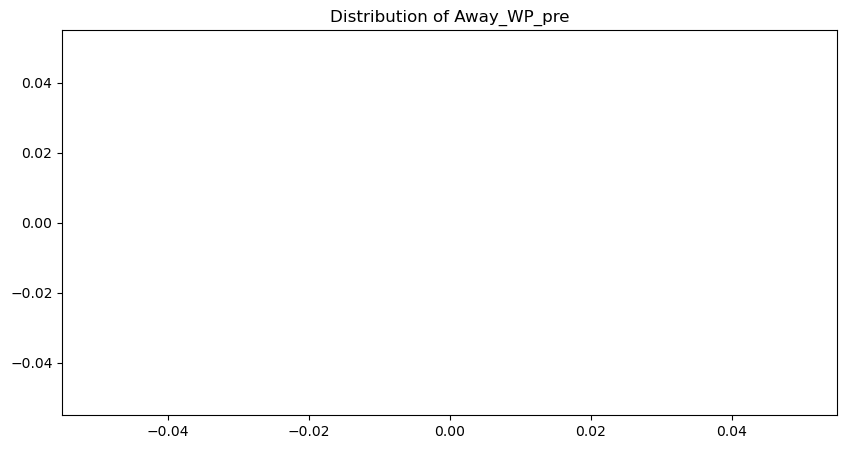

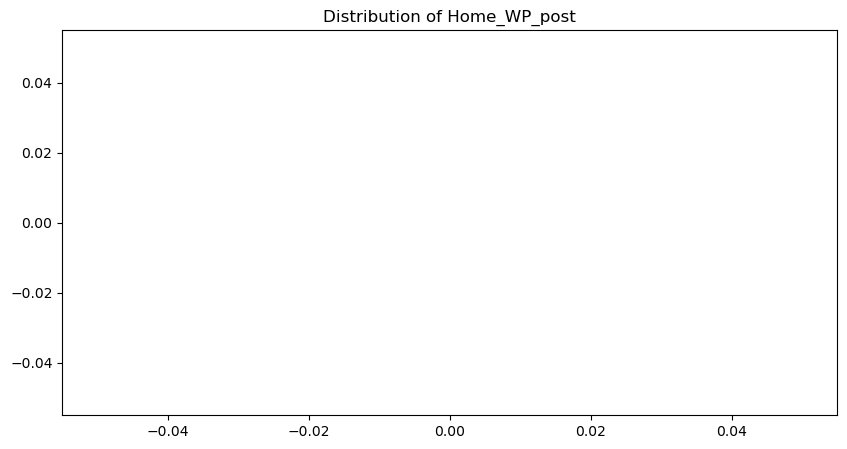

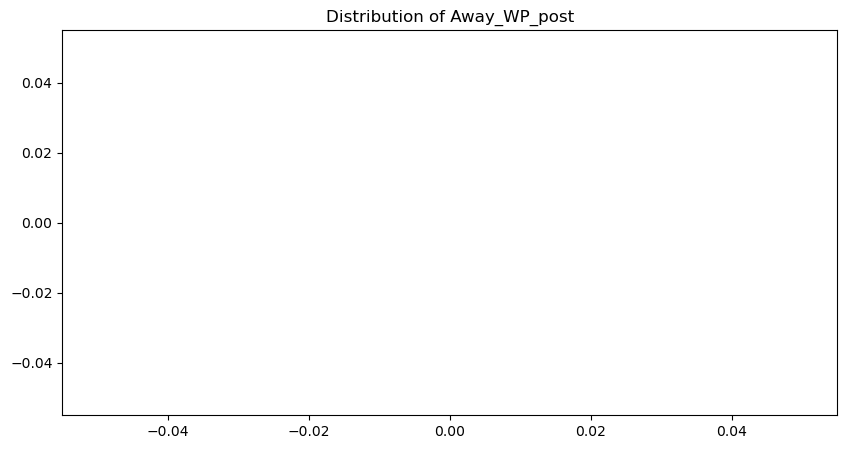

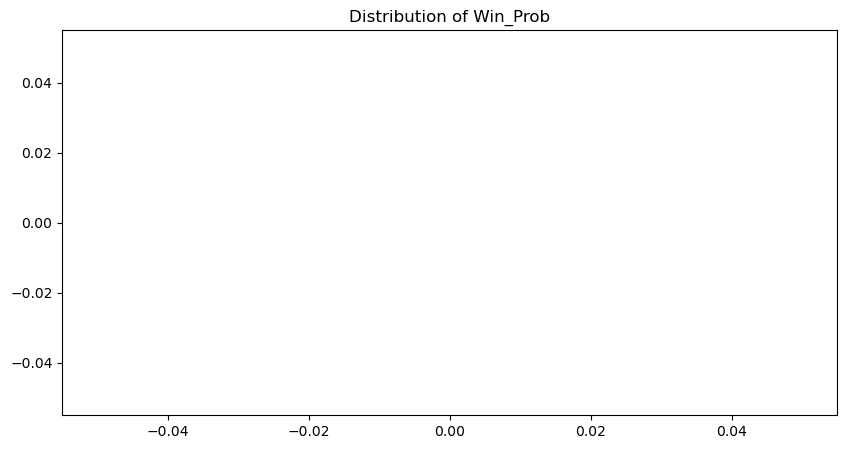

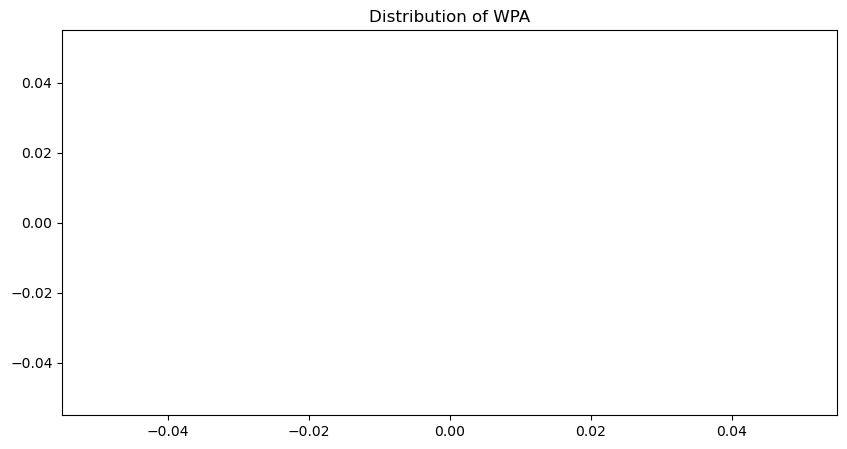

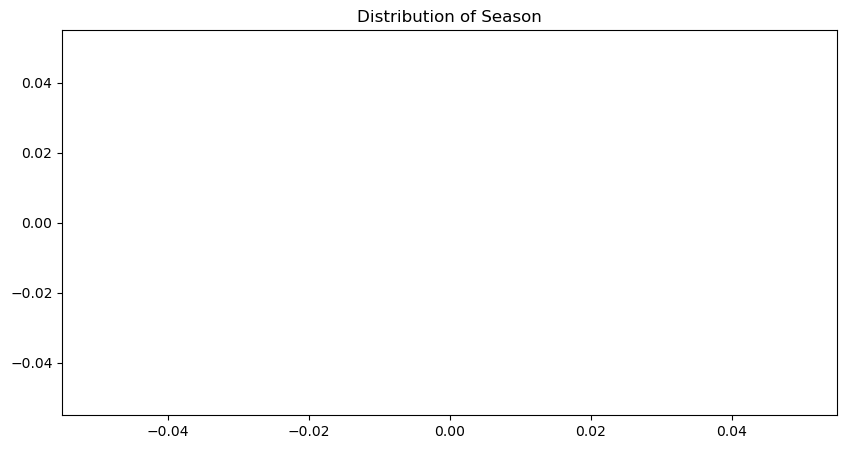

In [62]:
# Visualization of distributions
import matplotlib.pyplot as plt
import seaborn as sns
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\giris\AppData\Local\Temp\ipykernel_17848\2326200847.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
C:\Users\giris\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\giris\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


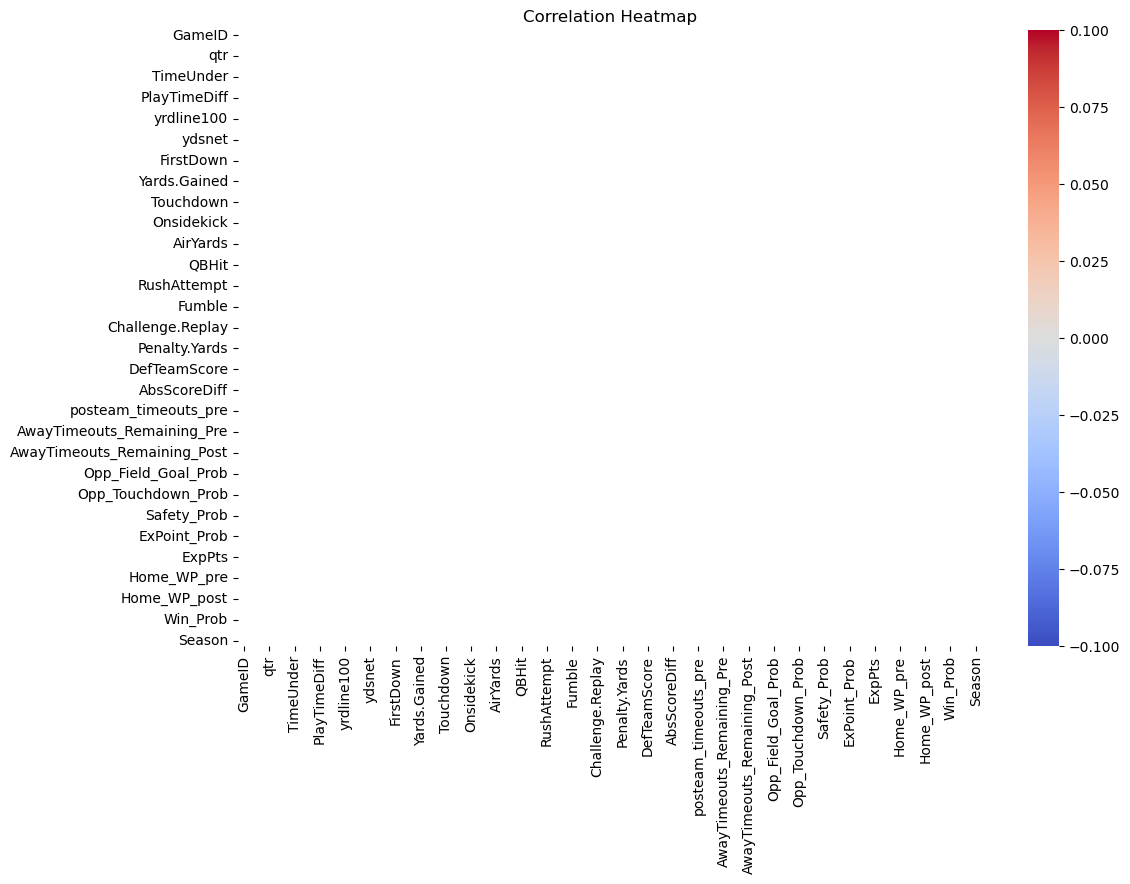

In [63]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [64]:
# Step 9: Documentation
documentation = """
Data Cleaning and Processing Pipeline:
1. Loaded the dataset and displayed its basic information.
2. Handled missing values:
    - Replaced 'NS' with NaN.
    - Dropped columns with more than 50% missing values.
    - Filled remaining missing values with the mean for numeric data and the most frequent value for non-numeric data.
3. Identified and removed outliers using the Z-score method.
4. Checked for and corrected inconsistencies in categorical data.
5. Removed duplicate rows from the dataset.
6. Conducted feature engineering to create new variables.
7. Applied normalization to numeric columns for better model performance.
8. Explored data distributions and relationships using visualization tools.
"""

In [65]:
print(documentation)

# Save the Cleaned Data
cleaned_file_path = r'C:\Users\giris\OneDrive\Desktop\cleaned_nfl_data.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to {cleaned_file_path}")


Data Cleaning and Processing Pipeline:
1. Loaded the dataset and displayed its basic information.
2. Handled missing values:
    - Replaced 'NS' with NaN.
    - Dropped columns with more than 50% missing values.
    - Filled remaining missing values with the mean for numeric data and the most frequent value for non-numeric data.
3. Identified and removed outliers using the Z-score method.
4. Checked for and corrected inconsistencies in categorical data.
5. Removed duplicate rows from the dataset.
6. Conducted feature engineering to create new variables.
7. Applied normalization to numeric columns for better model performance.
8. Explored data distributions and relationships using visualization tools.

Cleaned dataset saved to C:\Users\giris\OneDrive\Desktop\cleaned_nfl_data.csv
